<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

## Data Visualization

Text(0, 0.5, 'y')

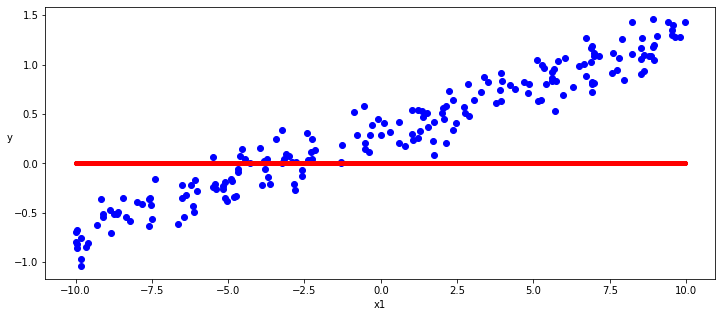

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
# class LinearRegressionPyTorch(torch.nn.Module): 
#     def __init__(self): 
#         super(LinearRegressionPyTorch, self).__init__() 
#         self.w = torch.tensor([0.0])
#         self.b = torch.tensor([0.0])
  
#     def forward(self, x):  
#         return x @ self.w + self.b
    
    
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])
    # adjusting 
    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.13077373802661896
Step 40, Loss 0.10296930372714996
Step 60, Loss 0.09576210379600525
Step 80, Loss 0.09007474780082703
Step 100, Loss 0.08487530052661896
Step 120, Loss 0.0800783634185791
Step 140, Loss 0.07565049082040787
Step 160, Loss 0.07156315445899963
Step 180, Loss 0.06779017299413681
Step 200, Loss 0.06430734694004059
Step 220, Loss 0.061092376708984375
Step 240, Loss 0.058124661445617676
Step 260, Loss 0.05538516864180565
Step 280, Loss 0.052856381982564926
Step 300, Loss 0.05052207037806511
Step 320, Loss 0.048367276787757874
Step 340, Loss 0.04637821018695831
Step 360, Loss 0.044542096555233
Step 380, Loss 0.04284720495343208
Step 400, Loss 0.041282664984464645
Step 420, Loss 0.03983844444155693
Step 440, Loss 0.03850528970360756
Step 460, Loss 0.037274669855833054
Step 480, Loss 0.036138687282800674


# PyTorch Training

In [10]:
x, y = generate_data()
x = x.numpy()
y = y.numpy()
x = x.reshape(-1, 1)
# x.shape

inputs = torch.autograd.Variable(torch.from_numpy(x))
labels = torch.autograd.Variable(torch.from_numpy(y))


In [20]:
epochs = 500
learning_rate = 0.001

def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()

# [w, b] = torch_model.parameters()

optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate, momentum=0.01)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 24.38370704650879
Epoch 20 : Loss 1.9917041063308716
Epoch 40 : Loss 0.7601100206375122
Epoch 60 : Loss 0.6693629026412964
Epoch 80 : Loss 0.6417639851570129
Epoch 100 : Loss 0.6192778944969177
Epoch 120 : Loss 0.5986573696136475
Epoch 140 : Loss 0.5796073079109192
Epoch 160 : Loss 0.5620000958442688
Epoch 180 : Loss 0.5457262992858887
Epoch 200 : Loss 0.5306848883628845
Epoch 220 : Loss 0.5167827010154724
Epoch 240 : Loss 0.5039333701133728
Epoch 260 : Loss 0.49205708503723145
Epoch 280 : Loss 0.4810800850391388
Epoch 300 : Loss 0.47093451023101807
Epoch 320 : Loss 0.46155717968940735
Epoch 340 : Loss 0.45289018750190735
Epoch 360 : Loss 0.44487929344177246
Epoch 380 : Loss 0.43747520446777344
Epoch 400 : Loss 0.4306317865848541
Epoch 420 : Loss 0.42430663108825684
Epoch 440 : Loss 0.4184604585170746
Epoch 460 : Loss 0.4130571782588959
Epoch 480 : Loss 0.4080628454685211


# Data Visualization

In [18]:
[b, w] = torch_model.parameters()

tf_model.params["w"], tf_model.params["b"], w, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.10100755>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.19277626>,
 Parameter containing:
 tensor([0.2328], requires_grad=True),
 Parameter containing:
 tensor([[0.0003]], requires_grad=True))

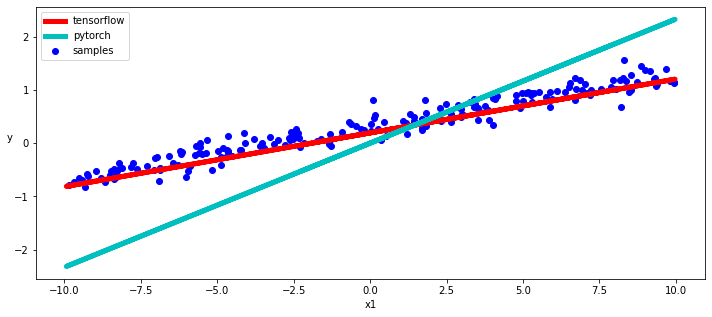

In [19]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * torch.tensor(x) + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)